### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/drugLibTrain_raw.tsv', sep='\t')
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [3]:
df.describe(include='object')

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107,3107,3106,3089,3032,3095
unique,502,5,5,1426,3031,2813,3046
top,lexapro,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,1330,1019,236,20,112,6


In [4]:
df.describe()

,Unnamed: 0,rating
count,3107.000000,3107.000000
mean,2080.607016,7.006115
std,1187.998828,2.937582
min,0.000000,1.000000
25%,1062.500000,5.000000
50%,2092.000000,8.000000
75%,3092.500000,9.000000
max,4161.000000,10.000000


effectiveness -	sideEffects -> Categóricas con menos de 10 únicos.

rating -> tipo numerica

In [5]:
df = df[['effectiveness', 'sideEffects', 'rating']]
df

,effectiveness,sideEffects,rating
0,Highly Effective,Mild Side Effects,4
1,Highly Effective,Severe Side Effects,1
2,Highly Effective,No Side Effects,10
3,Marginally Effective,Mild Side Effects,3
4,Marginally Effective,Severe Side Effects,2
...,...,...,...
3102,Highly Effective,Mild Side Effects,10
3103,Ineffective,Extremely Severe Side Effects,1
3104,Marginally Effective,Moderate Side Effects,2
3105,Considerably Effective,Mild Side Effects,8


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [6]:
df_2 = pd.get_dummies(df, dtype=int)
df_2

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,10,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,0,1,0,0,0,0,1,0,0,0
3103,1,0,0,1,0,0,1,0,0,0,0
3104,2,0,0,0,1,0,0,0,1,0,0
3105,8,1,0,0,0,0,0,1,0,0,0


In [7]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [8]:
my_dict = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9743.174036708042

Mayor silhouette scores con K=2

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_2) for k in range(2, 21)]

silhoutte = [silhouette_score(df_2, model.labels_)for model in kmeans_per_k]


c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416:

In [36]:
silhoutte

[0.6055089618561077,
 0.4381585450078779,
 0.39705280988017827,
 0.38842725965854547,
 0.3673618361948951,
 0.3772000181524037,
 0.39779536617934874,
 0.41106013540214303,
 0.4125937344330959,
 0.4200539070990699,
 0.45908418223373004,
 0.4887314699568079,
 0.4621876422965194,
 0.5138754419068728,
 0.47981956217572463,
 0.5150283625713127,
 0.5245617388091223,
 0.5356323632248283,
 0.5409190805080644]

In [ ]:
inercias = [model.inertia_ for model in kmeans_per_k]
inercias

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [37]:
kmeans = KMeans(n_clusters=2, random_state=24).fit(df_2)
kmeans.labels_

c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, ..., 1, 0, 1])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [39]:
import seaborn as sns

df_cluster = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_cluster

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
3102,0
3103,1
3104,1
3105,0


<Axes: ylabel='count'>

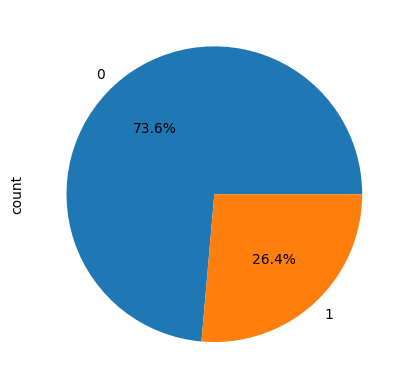

In [40]:
df_cluster['Cluster'].value_counts().plot.pie(autopct="%.1f%%")